In [2]:
from tensorflow.keras.models import load_model

In [11]:
import joblib 
import numpy as np
import pandas 

In [4]:
word_to_idx = joblib.load('./word_to_idx')

In [5]:
idx_to_word = joblib.load('./idx_to_word')

In [6]:
import cv2
from matplotlib import pyplot as plt

In [7]:
model = load_model('./model_weights/model_11.h5')

In [8]:
def predict_caption(photo):
    in_text = "startseq"
    
    for i in range(maxlen):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence] , maxlen = maxlen , padding = 'post')
        
        ypred = model.predict([photo , sequence])
        ypred = np.argmax(ypred)
        
        word = idx_to_word[ypred]
        in_text = in_text +' '+  word
        
        if word == "endseq":
            break
            
    final_caption = in_text
    return final_caption

In [9]:
encoding_test = joblib.load('./encoding_test')

In [13]:
import os 
IMG_PATH = r"C:\Users\marti\Desktop\ImageCaptioningDataSet\Flickr_Data\Flickr_Data\Images"
maxlen = 35

In [15]:
from keras.preprocessing.sequence import pad_sequences

startseq man with sunglasses and sunglasses smiles endseq


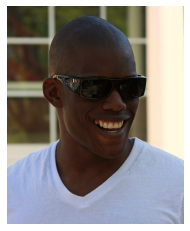

startseq three people are walking through the snow endseq


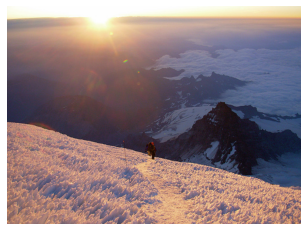

startseq dog is running through the grass endseq


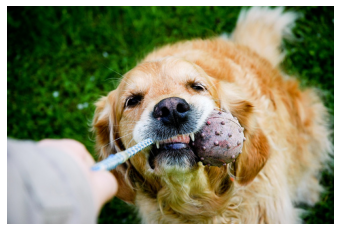

startseq group of children are standing in line endseq


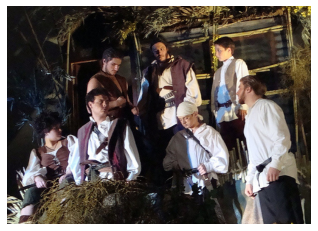

startseq two dogs are running around in the snow endseq


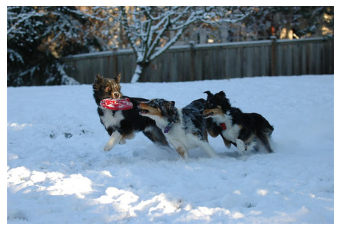

startseq little boy in pajamas crawls on the floor endseq


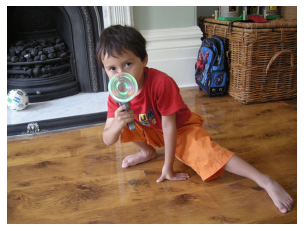

startseq little boy in blue shirt is jumping up in the air endseq


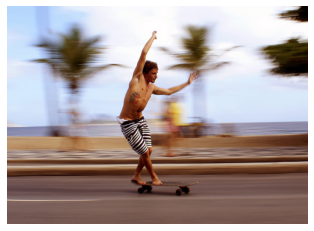

startseq man rides motorcycle on dirt track endseq


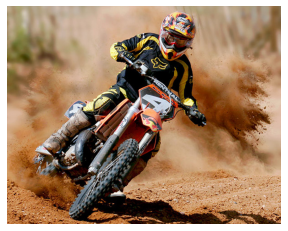

startseq two people are standing in front of statue of bicycles endseq


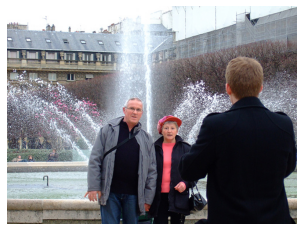

startseq two men in swimming trunks are jumping into the water endseq


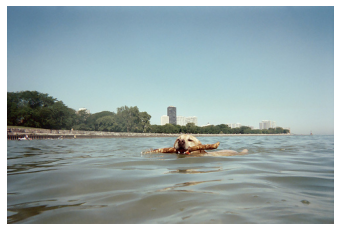

startseq man in black shirt and jeans is walking past wooden wall endseq


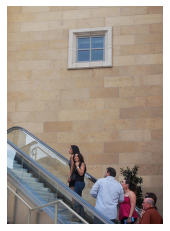

startseq group of people are riding their bikes on the street endseq


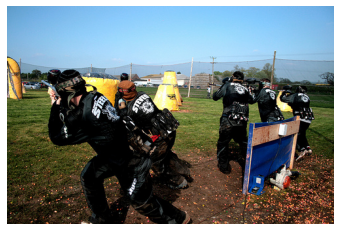

startseq dog running in the woods endseq


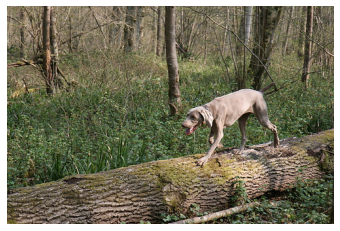

startseq man in swim trunks is jumping into the water endseq


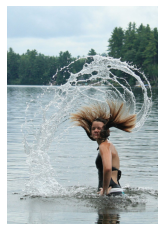

startseq group of children playing in the street endseq


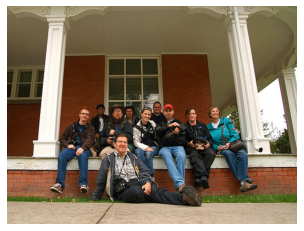

In [16]:
# Pick some random images and see results 
all_img_names = list(encoding_test.keys())

for i in range(15):
    idx = np.random.randint(0  , 1000)
    
    img_name = all_img_names[idx]
    
    photo = encoding_test[img_name]
    
    photo = photo.reshape((1  , -1))
    caption = predict_caption(photo)
    print(caption)
    i = plt.imread(os.path.join(IMG_PATH , img_name))
    
    plt.imshow(i)
    plt.axis('off')
    plt.show()